In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess as ls


In [2]:
def getWeek(data):
    day = dt.date.weekday(data[1])
    yr = data[1].year
    wk = dt.date.isocalendar(data[1])[1]

    # 0 is weekend, 1 is weekday

    if (day == 5 or day == 6):
         data[10] = 0
         data[11] = wk + ( abs(2006 - yr) * 52)
    elif (day != 5 and day != 6):
         data[10] = 1
         data[11] = wk + ( abs(2006 - yr) * 52)
    else:
         data[10] = -1
         data[11] = -1
    return data

In [3]:
def conDates(data):
    try:
        data[1] = pd.datetime.strptime(data[1], '%d/%m/%Y %H:%M:%S') 
    except ValueError:
        data[1] = pd.datetime.strptime(data[1], '%d/%m/%Y %H:%M')
    return data
    

In [4]:
#parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y %H:%M')

In [5]:
data = pd.read_csv("test_v1.csv", nrows=50000)

In [6]:
data = data.apply(conDates, axis=1)

In [7]:
arr = np.arange(0,10080)

In [9]:
data['day_type'] = pd.DataFrame({'day_type' : np.zeros(data.size)})
data['week'] = pd.DataFrame({'week' : np.zeros(data.size)})

data = data.sort_values(['DateTime'])

data2 = data.apply(getWeek, axis=1)
# 7 days worth
arr = np.arange(0,10080)


In [10]:
def plotWeekLoess(data):
    plt.figure(figsize=(20,10))
    for i in range(124,125):
        temp = data2.loc[data2['week'] == i]
        smooth = ls(temp['Global_active_power'], temp.index, frac=0.02)
        #p = plt.plot(arr, temp['Global_active_power'], '.')
        p = plt.plot(smooth[:,1], '-')

    return p

In [11]:
def plotWeek(data):
    plt.figure(figsize=(20,10))
    for i in range(125,126):
        temp = data2.loc[data2['week'] == i]
        smooth = ls(temp['Global_active_power'], arr, frac=0.003)
        #p = plt.plot(arr, temp['Global_active_power'], '.')
        p = plt.plot(smooth[:,1], '-', linewidth=2)

    return p


In [14]:
plt.figure(figsize=(20,10))
for i in range(125,126):
    temp = data2.loc[data2['week'] == i]
    smooth = ls(temp['Global_active_power'], arr, frac=0.003)
    #p = plt.plot(arr, temp['Global_active_power'], '.')
    p = plt.plot(smooth[:,1], '-', linewidth=2)

In [15]:
temp

Date            DateTime      Time  Global_active_power  \
38674  19/05/2008 2008-05-19 00:00:00  00:00:00             0.557350   
38673  19/05/2008 2008-05-19 00:01:00  00:01:00             0.300000   
38672  19/05/2008 2008-05-19 00:02:00  00:02:00             0.551250   
38671  19/05/2008 2008-05-19 00:03:00  00:03:00             0.296000   
38670  19/05/2008 2008-05-19 00:04:00  00:04:00             0.296000   
38669  19/05/2008 2008-05-19 00:05:00  00:05:00             0.296000   
38668  19/05/2008 2008-05-19 00:06:00  00:06:00             0.294000   
38667  19/05/2008 2008-05-19 00:07:00  00:07:00             0.547600   
38666  19/05/2008 2008-05-19 00:08:00  00:08:00             0.546050   
38665  19/05/2008 2008-05-19 00:09:00  00:09:00             0.292000   
38664  19/05/2008 2008-05-19 00:10:00  00:10:00             0.543200   
38663  19/05/2008 2008-05-19 00:11:00  00:11:00             0.542000   
38662  19/05/2008 2008-05-19 00:12:00  00:12:00             0.539450   
38661  19/05/2008 2008-05-19 00:13:00  00:13:00             0.537000   
38660  19/05/2008 2008-05-19 00:14:00  00:14:00             2.102458   
38659  19/05/2008 2008-05-19 00:15:00  00:15:00             0.532200   
38658  19/05/2008 2008-05-19 00:16:00  00:16:00             0.226000   
38657  19/05/2008 2008-05-19 00:17:00  00:17:00             0.527450   
38656  19/05/2008 2008-05-19 00:18:00  00:18:00             0.525100   
38655  19/05/2008 2008-05-19 00:19:00  00:19:00             0.525800   
38654  19/05/2008 2008-05-19 00:20:00  00:20:00             0.526200   
38653  19/05/2008 2008-05-19 00:21:00  00:21:00             0.334000   
38652  19/05/2008 2008-05-19 00:22:00  00:22:00             0.526850   
38651  19/05/2008 2008-05-19 00:23:00  00:23:00             0.334000   
38650  19/05/2008 2008-05-19 00:24:00  00:24:00             0.638058   
38649  19/05/2008 2008-05-19 00:25:00  00:25:00             0.527850   
38648  19/05/2008 2008-05-19 00:26:00  00:26:00             0.330000   
38647  19/05/2008 2008-05-19 00:27:00  00:27:00             0.330000   
38646  19/05/2008 2008-05-19 00:28:00  00:28:00             0.530100   
38645  19/05/2008 2008-05-19 00:29:00  00:29:00             1.087078   
...           ...                 ...       ...                  ...   
28624  25/05/2008 2008-05-25 23:30:00  23:30:00             0.292000   
28623  25/05/2008 2008-05-25 23:31:00  23:31:00             0.566350   
28622  25/05/2008 2008-05-25 23:32:00  23:32:00             0.563800   
28621  25/05/2008 2008-05-25 23:33:00  23:33:00             0.562050   
28620  25/05/2008 2008-05-25 23:34:00  23:34:00             0.560300   
28619  25/05/2008 2008-05-25 23:35:00  23:35:00             0.557950   
28618  25/05/2008 2008-05-25 23:36:00  23:36:00             0.554600   
28617  25/05/2008 2008-05-25 23:37:00  23:37:00             0.258000   
28616  25/05/2008 2008-05-25 23:38:00  23:38:00             0.551650   
28615  25/05/2008 2008-05-25 23:39:00  23:39:00             0.334000   
28614  25/05/2008 2008-05-25 23:40:00  23:40:00             0.550550   
28613  25/05/2008 2008-05-25 23:41:00  23:41:00             0.330000   
28612  25/05/2008 2008-05-25 23:42:00  23:42:00             0.549350   
28611  25/05/2008 2008-05-25 23:43:00  23:43:00             0.326000   
28610  25/05/2008 2008-05-25 23:44:00  23:44:00             0.326000   
28609  25/05/2008 2008-05-25 23:45:00  23:45:00             0.547300   
28608  25/05/2008 2008-05-25 23:46:00  23:46:00             0.322000   
28607  25/05/2008 2008-05-25 23:47:00  23:47:00             0.322000   
28606  25/05/2008 2008-05-25 23:48:00  23:48:00             0.544900   
28605  25/05/2008 2008-05-25 23:49:00  23:49:00             0.322000   
28604  25/05/2008 2008-05-25 23:50:00  23:50:00             0.546800   
28603  25/05/2008 2008-05-25 23:51:00  23:51:00             0.548350   
28602  25/05/2008 2008-05-25 23:52:00  23:52:00             0.322000   
28601  25/05/2008 2008-05-25 23:53:00  23:53:00      

In [12]:
p = plotWeek(data2)

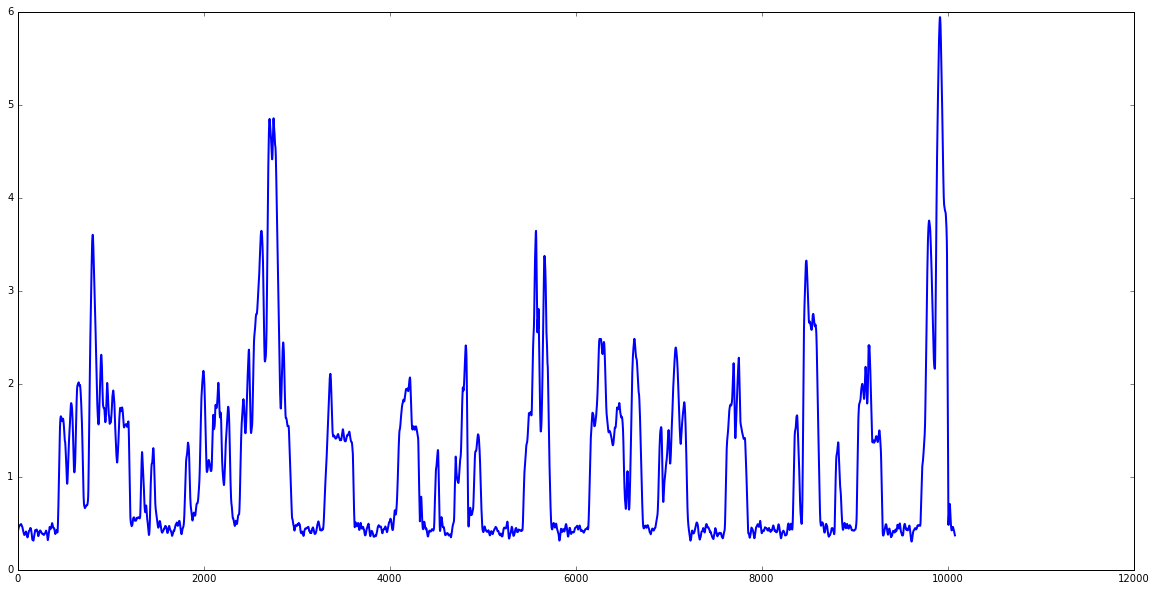

In [13]:
plt.show()
#plt.savefig('loess1.svg')
